# Worksheet 06

Name: Rithvik Nakirikanti, Jeremy Bui, Zuizz Saeed

UID: U57718462, U383281, 8 U19767343

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

K-means++ is an improvement over the standard K-means algorithm in terms of the initialization step. 
Instead of randomly selecting the initial centroids, K-means++ initializes them in a more intelligent way 
The first centroid is chosen randomly from the data poin .
Subsequent centroids are chosen with a probability proportional to the sqdua (or raised to a'th power depending on what you set a to be)red distance from the nearest previously chosen ceerro d.
This probabilistic approach tends to spread out the initial centroids, resulting in better initial cluster configurations and often leading to faster convergence and more accurate clustering results compared to the standard K-means alithmgthm

b) What are some limitations of K means ++?

K-means++ can really struggle with outliers, which can throw off the entire clustering process from the start. It's also tricky because you have to decide on the number of clusters, 
K, beforehand, and guessing wrong can mess up your results. Plus, figuring out the bes
�
K isn't always straightforward and often needs extra sthod, which adds to the workload.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

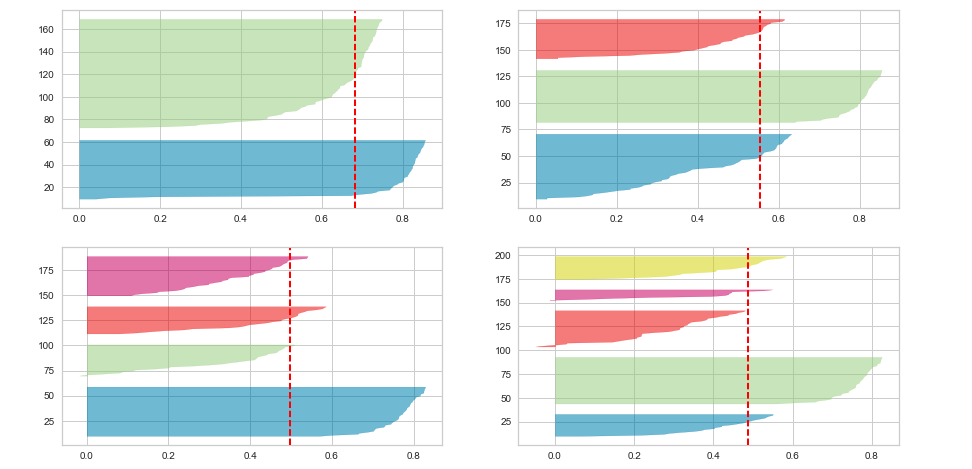

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I would choose cluster K=2 (top left) because of the amount of failing silhouette scores in K=4 and K=5. These two scores (K=4 and K=5) can be combined due to their similarity. Moreover, from my perspective, it appears that from the K=3 cluster, the red and blue silloute have similar scores leading me not to choose it. Therefore, it leaves us with the K=2 cluster. Overall, in the lecture, it was stated that it is quite difficult to immediately choose a cluster, which I do agree with. 

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

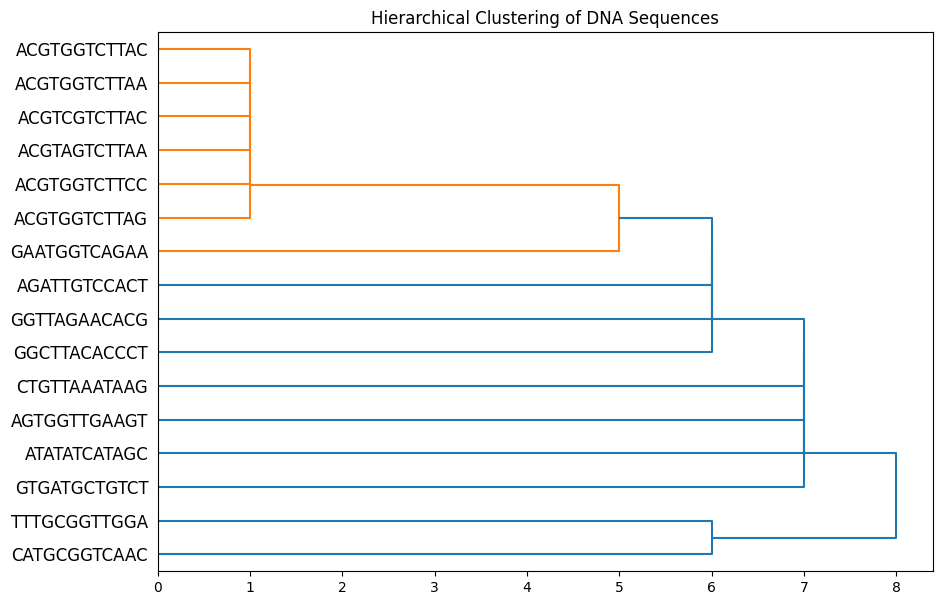

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import squareform

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

n = len(sequences)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i + 1, n):
        distance = hamming_distance(sequences[i], sequences[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

condensed_distance_matrix = squareform(distance_matrix)
linked = linkage(condensed_distance_matrix, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=sequences, orientation='right')
plt.title('Hierarchical Clustering of DNA Sequences')
plt.show()
